## NYC Leading causes of Death data analysis
### Apurva Padwal(apadwal2@illinois.edu)
                        

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

In [2]:
LCD_in_NYC = pd.read_csv('https://data.cityofnewyork.us/api/views/jb7j-dtam/rows.csv?accessType=DOWNLOAD',
                      na_values = {"Deaths": '.', "Death Rate": '.', "Age Adjusted Death Rate": '.'}).dropna()

Here, I decided to clean the data &  handle the null values right from the start, as a Team, we also decided to handle certain data value characters present in some columns to be safe in case of any errors.

### Exploring the Dataset & performing Exploratory data analysis

In [3]:
#Understanding the dimentionality of our Dataset
LCD_in_NYC.shape

(1196, 7)

In [4]:
#Validating successful data load by loading first 10 values in the dataset
LCD_in_NYC.head(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444.0,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361.0,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150.0,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146.0,96.0,143.5
5,2014,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,80.0,12.8,14.1
6,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Asian and Pacific Islander,42.0,6.7,6.9
7,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,159.0,18.5,19.1
8,2011,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,142.0,10.6,8.8
9,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,149.0,12.6,15.7
11,2009,Cerebrovascular Disease (Stroke: I60-I69),F,Black Non-Hispanic,245.0,23.4,21.3


In [5]:
#Loading last 10 values of the dataset to validate if the data was loaded completely.
LCD_in_NYC.tail(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
1771,2017,Malignant Neoplasms (Cancer: C00-C97),Male,Non-Hispanic White,3017.0,224.615373,176.084244
1772,2017,Mental and Behavioral Disorders due to Acciden...,Male,Non-Hispanic White,451.0,33.576909,30.976422
1773,2017,Influenza (Flu) and Pneumonia (J09-J18),Male,Non-Hispanic White,409.0,30.450012,22.399980
1774,2017,Chronic Lower Respiratory Diseases (J40-J47),Male,Non-Hispanic White,374.0,27.844266,20.874867
1775,2017,"Accidents Except Drug Poisoning (V01-X39, X43,...",Male,Non-Hispanic White,290.0,21.590473,18.051476
1776,2017,Cerebrovascular Disease (Stroke: I60-I69),Male,Non-Hispanic White,266.0,19.803676,14.881485
1777,2017,Diabetes Mellitus (E10-E14),Male,Non-Hispanic White,238.0,17.719078,13.951702
1778,2017,"Intentional Self-Harm (Suicide: U03, X60-X84, ...",Male,Non-Hispanic White,194.0,14.443282,12.952286
1779,2017,Essential Hypertension and Renal Diseases (I10...,Male,Non-Hispanic White,172.0,12.805384,9.466143
1780,2017,All Other Causes,Male,Non-Hispanic White,2167.0,161.332951,127.553288


In [6]:
#Grabbing details regarding the data type, non-null values and memory use.
LCD_in_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1780
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1196 non-null   int64  
 1   Leading Cause            1196 non-null   object 
 2   Sex                      1196 non-null   object 
 3   Race Ethnicity           1196 non-null   object 
 4   Deaths                   1196 non-null   float64
 5   Death Rate               1196 non-null   float64
 6   Age Adjusted Death Rate  1196 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 74.8+ KB


In [7]:
#Grabbing descriptive information about the Dataset
LCD_in_NYC.describe()

,Year,Deaths,Death Rate,Age Adjusted Death Rate
count,1196.000000,1196.000000,1196.000000,1196.000000
mean,2013.198997,574.511706,54.032610,52.798962
std,3.827082,927.938219,74.384457,68.451400
min,2007.000000,6.000000,2.400000,2.500000
25%,2010.000000,102.000000,12.469787,11.990448
50%,2013.000000,209.000000,19.330318,19.643177
75%,2017.000000,472.250000,70.275000,79.276000
max,2019.000000,7050.000000,491.400000,549.659366


In [8]:
#Checking if the Dataset has any duplicate rows
LCD_in_NYC.duplicated().sum()

0

In [9]:
#Checking if the Null values were handled at the start
LCD_in_NYC.isnull().sum()

Year                       0
Leading Cause              0
Sex                        0
Race Ethnicity             0
Deaths                     0
Death Rate                 0
Age Adjusted Death Rate    0
dtype: int64

In [10]:
#Dataset's Variable Analysis
LCD_in_NYC.value_counts()

Year  Leading Cause                                                            Sex     Race Ethnicity              Deaths  Death Rate  Age Adjusted Death Rate
2007  Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)         F       Asian and Pacific Islander  32.0    6.200000    7.600000                   1
2016  All Other Causes                                                         Female  Asian and Pacific Islander  385.0   58.903628   60.884572                  1
      Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)         Male    Non-Hispanic Black          153.0   17.795478   18.379137                  1
                                                                                       Hispanic                    177.0   14.654999   16.440433                  1
                                                                                       Asian and Pacific Islander  60.0    10.103238   11.082290                  1
                     

In [11]:
#Names of all the Columns in the Dataset
LCD_in_NYC.columns

Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate'],
      dtype='object')

In [12]:
#Grabbing Unique values for "Year" type
LCD_in_NYC['Year'].unique()

array([2011, 2008, 2010, 2014, 2013, 2009, 2012, 2007, 2018, 2019, 2015,
       2016, 2017], dtype=int64)

In [13]:
#Grabbing Unique values for "Leading Cause" type
LCD_in_NYC['Leading Cause'].unique()

array(['Chronic Lower Respiratory Diseases (J40-J47)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Chronic Liver Disease and Cirrhosis (K70, K73)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Assault (Homicide: Y87.1, X85-Y09)',
       'Diabetes Mellitus (E10-E14)',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)',
       'All Other Causes', 'Septicemia (A40-A41)',
       'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
       "Alzheimer's Disease (G30)",
       'Certain Conditions orig

In [14]:
#Grabbing Unique values for "Sex" type
LCD_in_NYC['Sex'].unique()

array(['M', 'F', 'Male', 'Female'], dtype=object)

In [15]:
##Grabbing Unique values for "Race Ethnicity" type
LCD_in_NYC['Race Ethnicity'].unique()

array(['White Non-Hispanic', 'Hispanic', 'Asian and Pacific Islander',
       'Black Non-Hispanic', 'Not Stated/Unknown', 'Non-Hispanic Black',
       'Non-Hispanic White'], dtype=object)

#### Cleaning the "Sex" Column for unique values Male & Female 

In [16]:
LCD_in_NYC['Sex'] = LCD_in_NYC['Sex'].replace({'M': 'Male', 'F': 'Female'})

In [17]:
#Grabbing Unique values for "Sex" type after cleaning
LCD_in_NYC['Sex'].unique()

array(['Male', 'Female'], dtype=object)

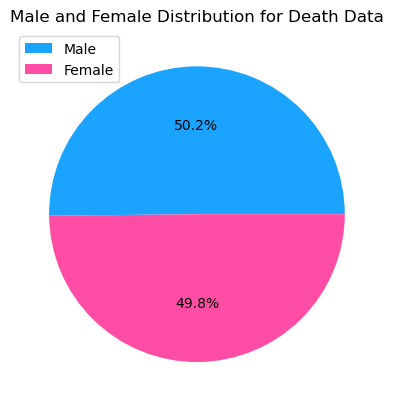

In [18]:
ValueSex = LCD_in_NYC['Sex'].value_counts()
colors = ['#1aa3ff', '#ff4da6']

plt.pie(ValueSex,
        labeldistance=1.15, 
        autopct='%1.1f%%',
        colors=colors);
plt.title('Male and Female Distribution for Death Data')
plt.legend(labels=['Male', 'Female'], loc='upper left')
plt.show();


Text(0.5, 1.0, 'Distribution of Deaths by Race Ethnicity')

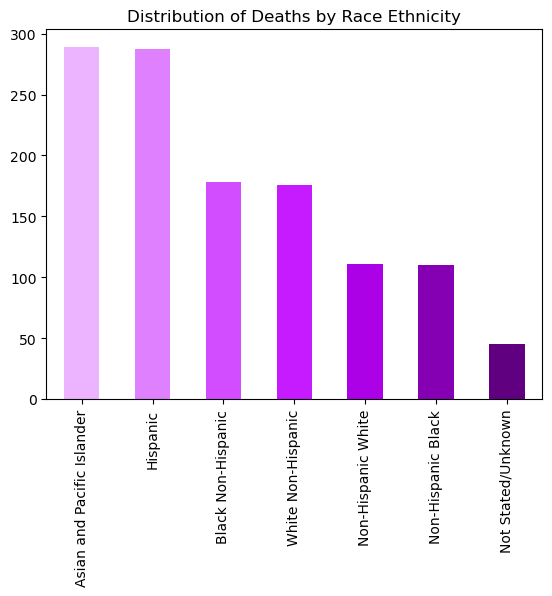

In [19]:
LCD_in_NYC['Race Ethnicity'].value_counts().plot(kind='bar', 
                                      color=['#ecb3ff','#df80ff','#d24dff','#c61aff','#ac00e6','#8600b3','#600080'])
plt.title('Distribution of Deaths by Race Ethnicity')

Text(0, 0.5, 'Deaths')

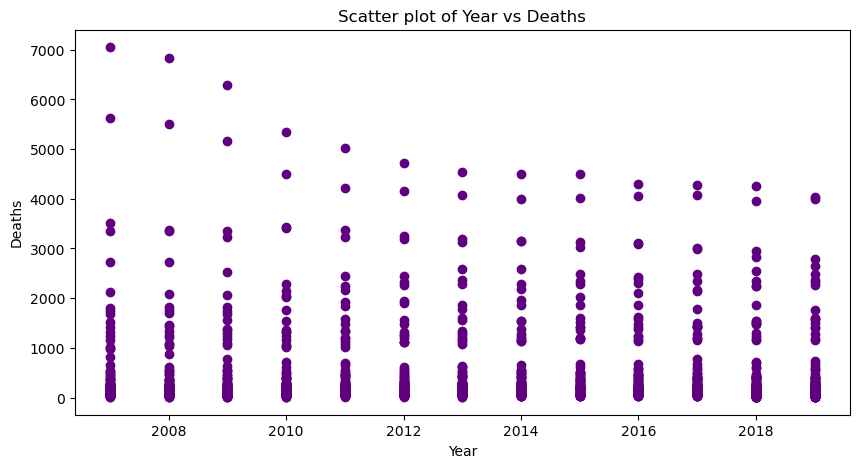

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(LCD_in_NYC['Year'],LCD_in_NYC['Deaths'], c='#600080')
plt.title('Scatter plot of Year vs Deaths')
plt.xlabel('Year')
plt.ylabel('Deaths')

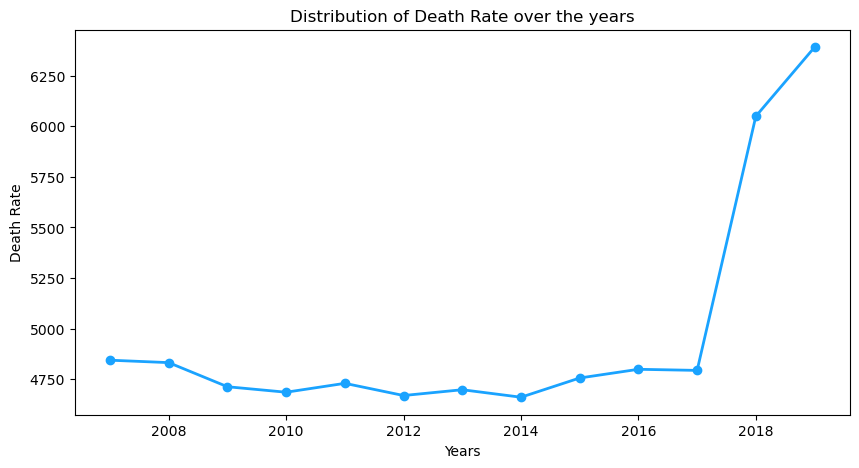

In [21]:
deathrate_by_year = LCD_in_NYC.groupby('Year')['Death Rate'].sum()
plt.figure(figsize=(10, 5))

plt.plot(deathrate_by_year.index, deathrate_by_year.values, color='#1aa3ff', marker='o', markersize=6, linewidth=2) 
plt.title('Distribution of Death Rate over the years')  
plt.xlabel('Years')  
plt.ylabel('Death Rate')  

plt.show()

In [22]:
max_death = LCD_in_NYC.groupby('Race Ethnicity',as_index=False)['Deaths'].max()

In [23]:
max_death

,Race Ethnicity,Deaths
0,Asian and Pacific Islander,770.0
1,Black Non-Hispanic,2725.0
2,Hispanic,1603.0
3,Non-Hispanic Black,2552.0
4,Non-Hispanic White,4494.0
5,Not Stated/Unknown,259.0
6,White Non-Hispanic,7050.0


In [24]:
max_death = max_death[max_death["Race Ethnicity"] != 'Not Stated/Unknown']

In [25]:
max_death

,Race Ethnicity,Deaths
0,Asian and Pacific Islander,770.0
1,Black Non-Hispanic,2725.0
2,Hispanic,1603.0
3,Non-Hispanic Black,2552.0
4,Non-Hispanic White,4494.0
6,White Non-Hispanic,7050.0


In [26]:
min_death = LCD_in_NYC.groupby('Race Ethnicity',as_index=False)['Deaths'].min()

In [27]:
min_death

,Race Ethnicity,Deaths
0,Asian and Pacific Islander,13.0
1,Black Non-Hispanic,70.0
2,Hispanic,49.0
3,Non-Hispanic Black,77.0
4,Non-Hispanic White,119.0
5,Not Stated/Unknown,6.0
6,White Non-Hispanic,75.0


In [28]:
min_death = min_death[min_death["Race Ethnicity"] != 'Not Stated/Unknown']

In [29]:
min_death

,Race Ethnicity,Deaths
0,Asian and Pacific Islander,13.0
1,Black Non-Hispanic,70.0
2,Hispanic,49.0
3,Non-Hispanic Black,77.0
4,Non-Hispanic White,119.0
6,White Non-Hispanic,75.0


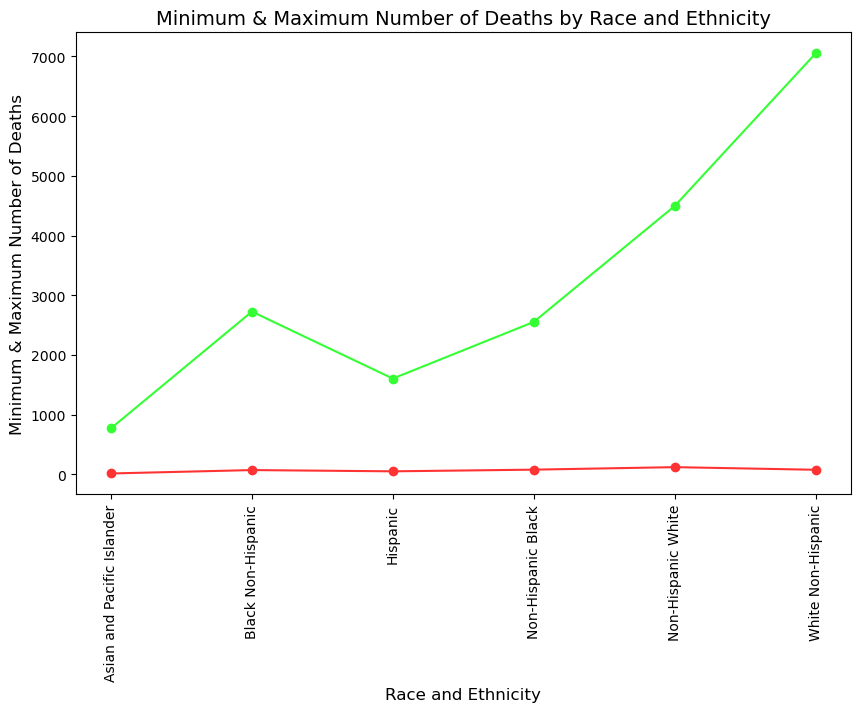

In [30]:
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.plot(max_death['Race Ethnicity'], max_death['Deaths'], color='#33FF33', marker='o')
ax.plot(min_death['Race Ethnicity'], min_death['Deaths'], color='#FF3333', marker='o')

ax.set_xlabel("Race and Ethnicity", fontsize=12)
ax.set_ylabel("Minimum & Maximum Number of Deaths", fontsize=12)
ax.set_title('Minimum & Maximum Number of Deaths by Race and Ethnicity', fontsize=14)

ax.tick_params(axis='x', rotation=90)

plt.show()

In this plot, The Line chart for minimum Number of Deaths looks like a straight line, that's because the maximum values overpower the size of graph so much that the minimum values can't be differentiated because of small number difference. This is not helping me visualize the Data effectively & Hence, I plan on visualizing the plot in a different way in next phase.

### Simple plot to show the relationship of interest

In [31]:
Avg_deathrate = LCD_in_NYC.groupby('Race Ethnicity',as_index=False)['Death Rate'].mean()

In [32]:
Avg_deathrate

,Race Ethnicity,Death Rate
0,Asian and Pacific Islander,29.074971
1,Black Non-Hispanic,65.946629
2,Hispanic,37.224416
3,Non-Hispanic Black,70.333405
4,Non-Hispanic White,78.330613
5,Not Stated/Unknown,54.496766
6,White Non-Hispanic,84.742614


In [33]:
Avg_deathrate = Avg_deathrate[Avg_deathrate["Race Ethnicity"] != 'Not Stated/Unknown']

In [34]:
Avg_deathrate

,Race Ethnicity,Death Rate
0,Asian and Pacific Islander,29.074971
1,Black Non-Hispanic,65.946629
2,Hispanic,37.224416
3,Non-Hispanic Black,70.333405
4,Non-Hispanic White,78.330613
6,White Non-Hispanic,84.742614


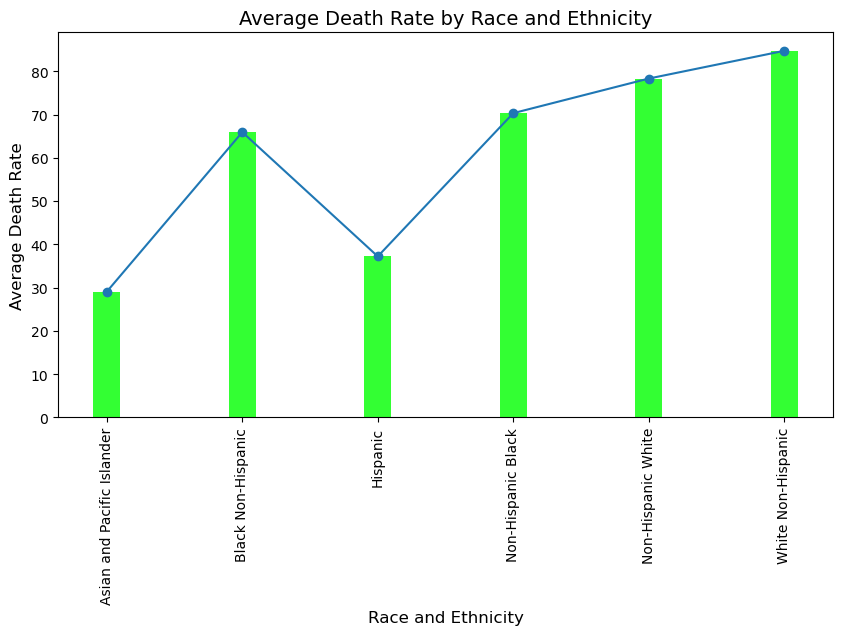

In [35]:
fig, ax = plt.subplots(figsize=(10,5))  

ax.bar(Avg_deathrate['Race Ethnicity'], Avg_deathrate['Death Rate'], color='#33FF33', width=0.2)  
ax.plot(Avg_deathrate['Race Ethnicity'], Avg_deathrate['Death Rate'], marker='o')

ax.set_xlabel("Race and Ethnicity", fontsize=12)  
ax.set_ylabel("Average Death Rate", fontsize=12)  
ax.set_title('Average Death Rate by Race and Ethnicity', fontsize=14) 

ax.tick_params(axis='x', rotation=90)

plt.show()

---
#### Explaination of the above plot:

With the above Visualization, I'm trying to show Average Death rate for each Race/ Ethnicity. I plotted it with a bar graph & also Connected it with Line chart to visually see the ups & Downs in the Death rate by each Race Ethnicity. Based on the plot, it's clearly visible that Average Death rate is the maximum for White Non-Hispanic people whereas it's the least for Asian & Pacific Islanders. I have Added Title, X & Y axis labels to make the visualizations easy for the viewer to understand. This visualization can help us understand if Race or Ethnicity plays any role in affecting Death Rate. It would be interesting to explore effect of Race & Ethnicity towards deaths so that further choices can be made to avoid the same.
I have also Plotted Minimum & Maximum number of Deaths for each Race Ethnicity before this plot, It can also be utilized further to understand Relationship between Deaths & race or Ethnicity.

---

#### DataSet Exploration:

To perform the EDA, after loading the Dataset, I checked the dimensions of the dataset to understand the size of data we're working with.Then I tried to grab First & last 10 values from the Dataset using Head() & Tail() function. That confirmed the data was loaded successfully. After this, I went ahead to grab more details about the Dataset using info() & Descrive() function. Tis gave me information regarding the data type, non-null values and memory use and some more descriptive details about the dataset. I also checked & handled the data with Duplicate rows & Null values.

---

#### Things that worked:
1. I handled the Null values while loading the dataset & verified the same. Later, I did not face any issues whileworking e=with the data because of this. 
2. After EDA, when I checked Unique values for each column, I realizaed that the "Sex" column had different values with same meaning, i.e., M & Male showing same meaning. So I worked on Replacing M with Male & F with Female to avoid unnecessary confusion.

---

#### Things that did not work:
1. After getting Unique values for first 4 columns, I decided not to Grab unique values for rest of the columns as there are numerous Unique values and grabbing that data is not necessary for analysis at this point. 
2. I also understood that the two columns(Leading Cause & Sex) need some data cleaning. I decided to Replace the Sex type Data from M & F to Male & Female. I asked my team member Pranav to help me with cleaning the "Leading Cause" Data type as I was facing difficulty understanding the cleaning process of that column. I could not figure out how I can do this step. I plan on performing this "Leading Cause" Data type Data clean in next phase of the Final project after learning the process.
---

#### Summarization of Dataset characteristics in words:

Link to the dataset: https://catalog.data.gov/dataset/new-york-city-leading-causes-of-death

This data provides the number of deaths, the reason, and how deaths are distributed according on Sex, Race, Ethinicity, and reason From 2007 to 2019 in New York City. The URL contains metadata that provides extra information on the columns in the dataset. The Leading Cause column provides the person's cause of death, which is obtained from the death certificate, which is issued after each death in New York City.
I utilized the column functionality to list all of the columns in the data set, which are 'Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths', 'Death Rate', and 'Age Adjusted Death Rate'. 
I also performed Variable analysis on the Data & saw if there are any duplicate rows, Null values & handled if any. The dimentionality showed the total numbber of Rows & columns in the Dataset viz 1196 & 7. The "Year" column being Numeric, shows the Year of occurance if the Death. According to the Metadata, this field's data type is Temporal. The Next Column "Sex" is a string type value and gives information about whether the person was Male or Female. Now, the column "Leading cause" is also a string type value & shows the reason of why the death occured in that specific instance. As per the metadata, it's nominal datatype of unorder string. The next String type data object is "Race Ethnicity" containing Information about Race & Ethnicity, Again as per the Metadata it's data type is nominal & it's a unordered string object. Rest of the columns are numeric having information regarding Number of Deaths, Death Rate on the basis of disease. Last column "Age Adjusted Death Rate" is also numeric and The formula for calculating it is-> total estimated deaths * 1,000.
In these data values, I have adjusted the data column "Sex" to make if more effective for use & visualization.

---

#### What is the "name" of the dataset?

New_York_City_Leading_Causes_of_Death

---

#### Where did you obtain it?

We utilized the resources that were offered in class to search for the dataset, and we found the topic at https://data.gov/, which is the official government website of the United States, and the dataset is under the https://catalog.data.gov/dataset and the precise url for the dataset is mentioned above.

---

#### Where can we obtain it? (i.e., URL)

CSV Link: https://data.cityofnewyork.us/api/views/jb7j-dtam/rows.csv?accessType=DOWNLOAD.

The link to different file format can be obtained from this url: https://catalog.data.gov/dataset/new-york-city-leading-causes-of-death#sec-dates

The said website also offers the data in multiple formats, So it's the user's choice to choose the one that works best for them to visualize the data.

---

#### What is the license of the dataset? What are we allowed to do with it?  This information is generally found in an "About" page or in documentation.  If there is no explicit license, use what you find in the dataset documentation to make your "best guess".

There was not an explicit reference to the license after reviewing all of the dataset's metadata and information. The "About" page wasn't there, neither the documentation included any license information. It is stated on the terms of usage page that this data set is for public use and that it is intended for free distribution. To the best of my knowledge, this dataset has an open license, and the public access indicates that we may use it for our project purposes; nevertheless, we must respect the usage guidelines when doing so. We are also allowed to make copies of it and edit the data as needed.

---

#### How big is it in file size and in items?  Looking ahead, how does this relate to GitHub's limitsLinks to an external site. on uploading large files?  If you plan on hosting the data yourself and it is larger than GitHub's limits, state your plan for how you will address this issue. 

We can see from the shape function that the dataset has 1196 rows and 7 columns. The csv file we used is 157Kb in size, with a typical upload limit of 100 MB, and we can utilize git large storage to upload files up to 2GB in size. Our file size is relatively little in comparison to these constraints, thus there will be no problems submitting this file.